In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Exploração dos Dados

## Carregar os dados:
### Ler o conjunto de dados de músicas do Spotify para análise e modelagem.



In [2]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')
sample_submission = pd.read_csv('datasets/sample_submission.csv')

print(train_data.head())


   track_unique_id                track_id            artists  \
0            41996  7hUhmkALyQ8SX9mJs5XI3D   Love and Rockets   
1            76471  5x59U89ZnjZXuNAAlc8X1u   Filippa Giordano   
2            54809  70Vng5jLzoJLmeLu3ayBQq      Susumu Yokota   
3            16326  1cRfzLJapgtwJ61xszs37b  Franz Liszt;YUNDI   
4           109799  47d5lYjbiMy0EdMRV8lRou            Scooter   

             album_name                              track_name  duration_ms  \
0      Love and Rockets                              Motorcycle       211533   
1      Filippa Giordano  Addio del passato - From "La traviata"       196000   
2                Symbol                      Purple Rose Minuet       216506   
3  Relajación y siestas            Liebeslied (Widmung), S. 566       218346   
4       Scooter Forever                            The Darkside       173160   

   explicit  danceability  energy  key  ...  mode  speechiness  acousticness  \
0     False         0.305  0.8490    9  ...     

## Exploração inicial dos dados:

### Visualizar as primeiras linhas para entender a estrutura dos dados. Verificar o tipo de cada coluna (numérico, categórico, etc.). Analisar as estatísticas descritivas básicas (média, mediana, valores mínimos e máximos, etc.).

In [3]:
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_unique_id    79800 non-null  int64  
 1   track_id           79800 non-null  object 
 2   artists            79800 non-null  object 
 3   album_name         79800 non-null  object 
 4   track_name         79800 non-null  object 
 5   duration_ms        79800 non-null  int64  
 6   explicit           79800 non-null  bool   
 7   danceability       79800 non-null  float64
 8   energy             79800 non-null  float64
 9   key                79800 non-null  int64  
 10  loudness           79800 non-null  float64
 11  mode               79800 non-null  int64  
 12  speechiness        79800 non-null  float64
 13  acousticness       79800 non-null  float64
 14  instrumentalness   79800 non-null  float64
 15  liveness           79800 non-null  float64
 16  valence            798

In [4]:
# Verificar colunas categóricas com tipo 'object'
categorical_columns = train_data.select_dtypes(include=['object']).columns
print(f'Colunas categóricas: {list(categorical_columns)}')

numeric_columns = train_data.select_dtypes(include=['number']).columns
print(f'Colunas numericas: {list(numeric_columns)}')

Colunas categóricas: ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
Colunas numericas: ['track_unique_id', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'popularity_target']


In [5]:
for col in categorical_columns:
    unique_count = train_data[col].nunique()
    print(f'{col} - Número de valores únicos: {unique_count}')

track_id - Número de valores únicos: 66720
artists - Número de valores únicos: 25775
album_name - Número de valores únicos: 37315
track_name - Número de valores únicos: 55767
track_genre - Número de valores únicos: 114


In [6]:
unique_genres = train_data['track_genre'].unique()
print(unique_genres)

['goth' 'opera' 'idm' 'classical' 'techno' 'pop' 'acoustic' 'study'
 'trance' 'progressive-house' 'dance' 'forro' 'mpb' 'emo' 'kids' 'dubstep'
 'dancehall' 'rockabilly' 'children' 'cantopop' 'indie-pop' 'rock-n-roll'
 'punk' 'black-metal' 'pop-film' 'club' 'heavy-metal' 'hardcore' 'swedish'
 'chill' 'r-n-b' 'power-pop' 'trip-hop' 'piano' 'hip-hop' 'funk' 'rock'
 'hardstyle' 'j-dance' 'country' 'german' 'garage' 'malay' 'deep-house'
 'folk' 'death-metal' 'disney' 'hard-rock' 'disco' 'indian' 'pagode'
 'brazil' 'minimal-techno' 'punk-rock' 'bluegrass' 'indie' 'spanish'
 'gospel' 'sleep' 'new-age' 'sertanejo' 'psych-rock' 'j-rock' 'reggaeton'
 'guitar' 'alternative' 'breakbeat' 'latino' 'synth-pop' 'electronic'
 'sad' 'alt-rock' 'songwriter' 'party' 'reggae' 'detroit-techno' 'salsa'
 'dub' 'british' 'samba' 'blues' 'happy' 'grindcore' 'french' 'k-pop'
 'metalcore' 'honky-tonk' 'industrial' 'ska' 'metal' 'groove'
 'chicago-house' 'iranian' 'drum-and-bass' 'show-tunes' 'romance'
 'ambient' 

### Tratamento de valores nulos:
 Identificar colunas com valores ausentes. Decidir como tratar os valores nulos (excluir registros, preencher com média/mediana/moda ou criar uma categoria "desconhecido") se necessário.

In [7]:
print(train_data.isnull().sum())

track_unique_id      0
track_id             0
artists              0
album_name           0
track_name           0
duration_ms          0
explicit             0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
track_genre          0
popularity_target    0
dtype: int64


### Agrupamento e codificação de variáveis

In [8]:
# Calcular a popularidade média por gênero
average_popularity_by_genre = train_data.groupby('track_genre')['popularity_target'].mean()

# Listar gêneros com popularidade média baixa (definir um threshold, por exemplo, abaixo de 0.1)
low_popularity_genres = average_popularity_by_genre[average_popularity_by_genre < 0.5]
high_popularity_genres = average_popularity_by_genre[average_popularity_by_genre > 0.5]


# Printar os gêneros com baixa / alta popularidade média
print("Gêneros com popularidade média baixa:")
print(low_popularity_genres.sort_values())

print("Gêneros com popularidade média alta:")
print(high_popularity_genres.sort_values())


Gêneros com popularidade média baixa:
track_genre
romance           0.000000
iranian           0.000000
tango             0.005764
grindcore         0.015015
detroit-techno    0.039886
kids              0.049296
chicago-house     0.050992
party             0.059435
comedy            0.062059
honky-tonk        0.073171
bluegrass         0.074392
happy             0.089489
idm               0.095745
j-idol            0.098571
heavy-metal       0.102384
salsa             0.105409
classical         0.108883
latin             0.121951
black-metal       0.138032
power-pop         0.142229
afrobeat          0.143670
opera             0.177465
breakbeat         0.183217
disney            0.184286
j-dance           0.186589
goth              0.197917
hardstyle         0.206009
drum-and-bass     0.255014
show-tunes        0.269795
malay             0.273392
rock              0.274566
new-age           0.276353
jazz              0.277037
guitar            0.287921
dance             0.289773
indus

In [9]:
# Dicionário para agrupar os gêneros em categorias maiores, corrigido para evitar duplicidade
genre_map = {
    # Pop
    'pop': 'Pop',
    'indie-pop': 'Pop',
    'pop-film': 'Pop',
    'j-pop': 'Pop',
    'sad': 'Pop',
    
    # Rock/Metal
    'hard-rock': 'Rock/Metal',
    'punk-rock': 'Rock/Metal',
    'psych-rock': 'Rock/Metal',
    'alt-rock': 'Rock/Metal',
    'emo': 'Rock/Metal',
    'grunge': 'Rock/Metal',
    'metalcore': 'Rock/Metal',
    'punk': 'Rock/Metal',
    'j-rock': 'Rock/Metal',  # Adicionado ao grupo Rock/Metal
    
    # Eletrônica
    'edm': 'Eletrônica',
    'techno': 'Eletrônica',
    'house': 'Eletrônica',
    'minimal-techno': 'Eletrônica',
    'deep-house': 'Eletrônica',
    'progressive-house': 'Eletrônica',
    'electronic': 'Eletrônica',
    'dubstep': 'Eletrônica',
    'club': 'Eletrônica',
    'electro': 'Eletrônica',
    'trance': 'Eletrônica',
    'garage': 'Eletrônica',
    'ambient': 'Eletrônica',
    'chill': 'Eletrônica',  # Adicionado ao grupo Eletrônica
    
    # Hip-Hop/Funk
    'hip-hop': 'Hip-Hop/Funk',
    'rap': 'Hip-Hop/Funk',
    'trap': 'Hip-Hop/Funk',
    'funk': 'Hip-Hop/Funk',
    'r-n-b': 'Hip-Hop/Funk',
    'groove': 'Hip-Hop/Funk',  # Adicionado ao grupo Hip-Hop/Funk

    # Reggae e derivados
    'dub': 'Reggae e Derivados',
    'ska': 'Reggae e Derivados',  # Adicionado ao grupo Reggae e Derivados
    
    # Gêneros Asiáticos
    'k-pop': 'Ásia',
    'mandopop': 'Ásia',
    'anime': 'Ásia',  # Adicionado ao grupo Ásia

    # Música Brasileira
    'mpb': 'Música Brasileira',
    'pagode': 'Música Brasileira',
    'forro': 'Música Brasileira',
    'brazil': 'Música Brasileira',
    'samba': 'Música Brasileira',
    'sertanejo': 'Música Brasileira',

    # Folk/Acústico
    'folk': 'Folk/Acústico',
    'acoustic': 'Folk/Acústico',
    'piano': 'Folk/Acústico',

    # Jazz/Blues
    'gospel': 'Jazz/Blues', 
    
    # Europeu (Novo grupo)
    'french': 'Europeu',  # Novo grupo Europeu
    'swedish': 'Europeu',  # Adicionado ao grupo Europeu
    'british': 'Europeu',  # Adicionado ao grupo Europeu

    # Oriente Médio (Novo grupo)
    'turkish': 'Oriente Médio',  # Novo grupo Oriente Médio
    'indian': 'Oriente Médio',  # Novo grupo Oriente Médio
}

# Aplicar o mapeamento ao dataset de treino e teste
train_data['track_genre_grouped'] = train_data['track_genre'].map(genre_map).fillna('Outros')
test_data['track_genre_grouped'] = train_data['track_genre'].map(genre_map).fillna('Outros')

# Verificando os grupos criados
print(train_data['track_genre_grouped'].value_counts())

track_genre_grouped
Outros                43312
Eletrônica             9839
Rock/Metal             6304
Música Brasileira      4221
Pop                    3508
Hip-Hop/Funk           2787
Ásia                   2115
Europeu                2104
Folk/Acústico          2089
Oriente Médio          1415
Reggae e Derivados     1398
Jazz/Blues              708
Name: count, dtype: int64


In [10]:
# Aplicar One-Hot Encoding para a coluna 'track_genre_grouped'
train_data = pd.get_dummies(train_data, columns=['track_genre_grouped'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['track_genre_grouped'], drop_first=True)

train_data.head()

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,track_genre_grouped_Folk/Acústico,track_genre_grouped_Hip-Hop/Funk,track_genre_grouped_Jazz/Blues,track_genre_grouped_Música Brasileira,track_genre_grouped_Oriente Médio,track_genre_grouped_Outros,track_genre_grouped_Pop,track_genre_grouped_Reggae e Derivados,track_genre_grouped_Rock/Metal,track_genre_grouped_Ásia
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,False,False,False,False,False,True,False,False,False,False
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,False,False,False,False,False,True,False,False,False,False
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,False,False,False,False,False,True,False,False,False,False
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,False,False,False,False,False,True,False,False,False,False
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# Filtrar as colunas relacionadas aos gêneros agrupados
genre_columns = train_data.filter(like='track_genre_grouped').columns

# Converter as colunas de One-Hot Encoding para valores numéricos 0 e 1
train_data[genre_columns] = train_data[genre_columns].astype(int)
test_data[genre_columns] = test_data[genre_columns].astype(int)

print(train_data[genre_columns].dtypes)


track_genre_grouped_Europeu               int32
track_genre_grouped_Folk/Acústico         int32
track_genre_grouped_Hip-Hop/Funk          int32
track_genre_grouped_Jazz/Blues            int32
track_genre_grouped_Música Brasileira     int32
track_genre_grouped_Oriente Médio         int32
track_genre_grouped_Outros                int32
track_genre_grouped_Pop                   int32
track_genre_grouped_Reggae e Derivados    int32
track_genre_grouped_Rock/Metal            int32
track_genre_grouped_Ásia                  int32
dtype: object


In [12]:
train_data.head()

,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,track_genre_grouped_Folk/Acústico,track_genre_grouped_Hip-Hop/Funk,track_genre_grouped_Jazz/Blues,track_genre_grouped_Música Brasileira,track_genre_grouped_Oriente Médio,track_genre_grouped_Outros,track_genre_grouped_Pop,track_genre_grouped_Reggae e Derivados,track_genre_grouped_Rock/Metal,track_genre_grouped_Ásia
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,0,0,0,0,0,1,0,0,0,0
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0,0,0,0,1,0,0,0,0
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,0,0,0,0,0,1,0,0,0,0
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,0,0,0,0,0,1,0,0,0,0
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# Calcular a correlação apenas entre popularity_target e as colunas de gêneros
correlation_matrix = train_data[['popularity_target'] + list(genre_columns)].corr()

# Filtrar as correlações da coluna 'popularity_target' com os gêneros agrupados
popularity_correlation = correlation_matrix['popularity_target'].drop('popularity_target')

# Exibir as correlações em ordem decrescente
print(popularity_correlation.sort_values(ascending=False))

track_genre_grouped_Música Brasileira     0.223883
track_genre_grouped_Pop                   0.138388
track_genre_grouped_Oriente Médio         0.128926
track_genre_grouped_Ásia                  0.126142
track_genre_grouped_Rock/Metal            0.119584
track_genre_grouped_Jazz/Blues            0.095070
track_genre_grouped_Folk/Acústico         0.065302
track_genre_grouped_Hip-Hop/Funk          0.054947
track_genre_grouped_Europeu               0.048753
track_genre_grouped_Reggae e Derivados    0.032293
track_genre_grouped_Outros               -0.470409
Name: popularity_target, dtype: float64


C:\Users\paiva\AppData\Local\Temp\ipykernel_14368\3944325840.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popularity_correlation.values, y=popularity_correlation.index, palette='coolwarm')


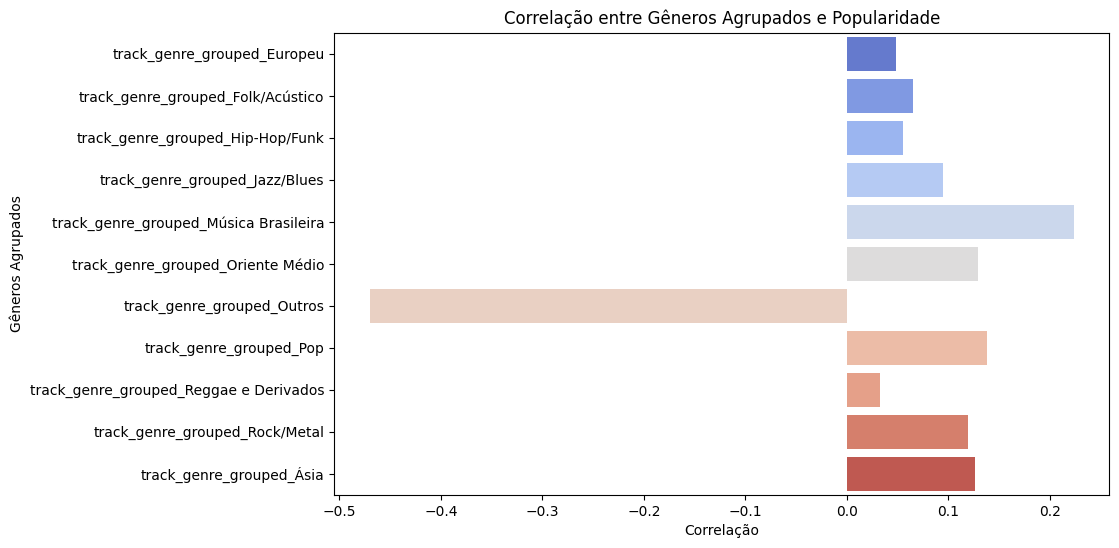

In [14]:
# Criar um gráfico de barras para visualização das correlações
plt.figure(figsize=(10, 6))
sns.barplot(x=popularity_correlation.values, y=popularity_correlation.index, palette='coolwarm')
plt.title('Correlação entre Gêneros Agrupados e Popularidade')
plt.xlabel('Correlação')
plt.ylabel('Gêneros Agrupados')
plt.show()

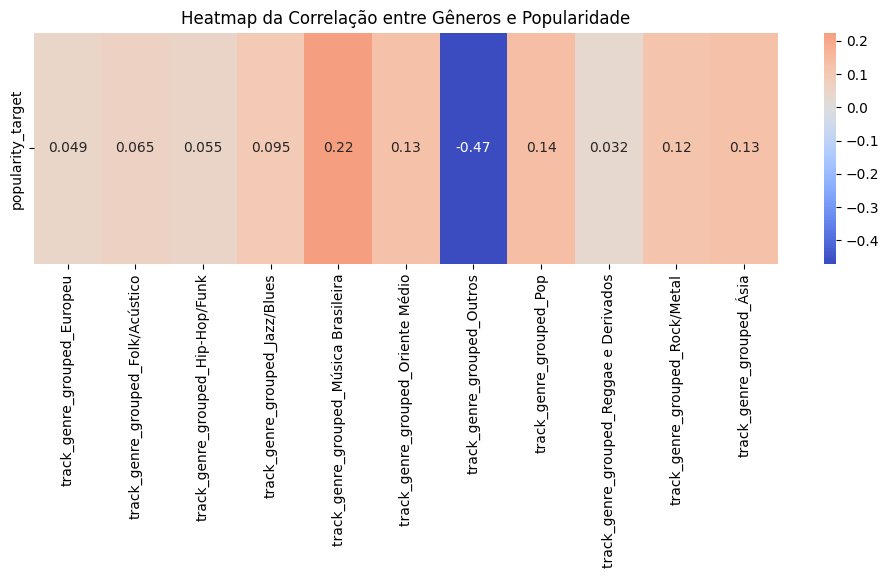

In [15]:
# Criar um heatmap para visualização das correlações
plt.figure(figsize=(12, 3))
sns.heatmap(popularity_correlation.to_frame().T, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap da Correlação entre Gêneros e Popularidade')
plt.show()

### Padronização dos dados

In [16]:
from sklearn.preprocessing import StandardScaler

# Colunas numéricas que precisam de normalização
numeric_columns = ['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
                   'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
                   'tempo', 'time_signature']


scaler = StandardScaler()
train_data[numeric_columns] = scaler.fit_transform(train_data[numeric_columns])
test_data[numeric_columns] = scaler.transform(test_data[numeric_columns])

print(train_data.head())

   track_unique_id                track_id            artists  \
0            41996  7hUhmkALyQ8SX9mJs5XI3D   Love and Rockets   
1            76471  5x59U89ZnjZXuNAAlc8X1u   Filippa Giordano   
2            54809  70Vng5jLzoJLmeLu3ayBQq      Susumu Yokota   
3            16326  1cRfzLJapgtwJ61xszs37b  Franz Liszt;YUNDI   
4           109799  47d5lYjbiMy0EdMRV8lRou            Scooter   

             album_name                              track_name  duration_ms  \
0      Love and Rockets                              Motorcycle    -0.155809   
1      Filippa Giordano  Addio del passato - From "La traviata"    -0.303659   
2                Symbol                      Purple Rose Minuet    -0.108474   
3  Relajación y siestas            Liebeslied (Widmung), S. 566    -0.090960   
4       Scooter Forever                            The Darkside    -0.521060   

   explicit  danceability    energy       key  ...  \
0     False     -1.515338  0.825132  1.036718  ...   
1     False     -1.6

### Implementação do PCA

In [1]:
# from sklearn.decomposition import PCA
# import matplotlib.pyplot as plt

# # Inicializar o PCA sem especificar o número de componentes (isso nos permite ver toda a variância)
# pca = PCA()

# # Aplicar o PCA aos dados normalizados (numeric_columns)
# x_pca = pca.fit_transform(train_data[numeric_columns])

# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
# plt.title('Variância Explicada Acumulada por Componentes Principais')
# plt.xlabel('Número de Componentes Principais')
# plt.ylabel('Variância Explicada Acumulada')
# plt.grid(True)
# plt.show()

In [18]:
# pca = PCA(n_components=8)
# X_pca = pca.fit_transform(train_data[numeric_columns])

# # Adicionar os componentes principais ao dataset de treino
# for i in range(pca.n_components_):
#     train_data[f'PCA_Component_{i+1}'] = X_pca[:, i]

# # Aplicar o PCA no conjunto de teste (sem refit)
# X_test_pca = pca.transform(test_data[numeric_columns])

# # Adicionar os componentes principais ao conjunto de teste
# for i in range(pca.n_components_):
#     test_data[f'PCA_Component_{i+1}'] = X_test_pca[:, i]

## Treinar o Modelo

### Separar as features e a variável alvo:

In [19]:
# Combinar as colunas numéricas e as colunas de gêneros para formar as features finais
all_feature_columns = numeric_columns + list(genre_columns)

# Separar as features (X) e a variável alvo (y)
X = train_data[all_feature_columns]
y = train_data['popularity_target']

### Implementação do Pycaret

In [21]:
%pip install pycaret

Defaulting to user installation because normal site-packages is not writeable
  Using cached pycaret-3.3.2-py3-none-any.whl.metadata (17 kB)
  Using cached ipywidgets-8.1.5-py3-none-any.whl.metadata (2.3 kB)
  Using cached pyod-2.0.2-py3-none-any.whl
  Using cached imbalanced_learn-0.12.3-py3-none-any.whl.metadata (8.3 kB)
  Using cached category_encoders-2.6.3-py2.py3-none-any.whl.metadata (8.0 kB)
  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
  Using cached plotly_resampler-0.10.0-py3-none-any.whl.metadata (13 kB)
  Using cached sktime-0.26.0-py3-none-any.whl.metadata (29 kB)
  Using cached tbats-1.1.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached pmdarima-2.0.4-cp312-cp312-win_amd64.whl.metadata (8.0 kB)
  Using cached jsonschema-4.23.0-py3-none-any.whl.metadata (7.9 kB)
  Using cached dash-2.18.1-py3-none-any.whl.metadata (10 kB)
Using cached pycaret-3.3.2-py3-none-any.whl (486 kB)
Using cac

In [2]:
# from pycaret.classification import *

# # Incluir a variável alvo 'popularity_target' e os componentes principais como features
# train_pca_data = train_data[[f'PCA_Component_{i+1}' for i in range(pca.n_components_)] + ['popularity_target']]

# Definir a tarefa de classificação e a variável alvo
